## 2. 크롤링(crawling) 이해 및 기본

### 2.1. 크롤링(crawling) 이란?
  - Web상에 존재하는 Contents를 수집하는 작업 (프로그래밍으로 자동화 가능)
      1. HTML 페이지를 **가져와서**, HTML/CSS등을 **파싱**하고, 필요한 데이터만 추출하는 기법
      2. **Open API(Rest API)**를 제공하는 서비스에 Open API를 호출해서, 받은 데이터 중 필요한 데이터만 추출하는 기법
      3. **Selenium**등 브라우저를 프로그래밍으로 조작해서, 필요한 데이터만 추출하는 기법

### 2.2. BeautifulSoup 라이브러리를 활용한 초간단 예제
  - HTML의 태그를 파싱해서 필요한 데이터만 추출하는 함수를 제공하는 라이브러리
  - [BeautifulSoup 라이브러리 페이지](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
  - 설치 방법
    - pip install bs4
  - [참고: BeautifulSoup 4 API Guide](http://omz-software.com/pythonista/docs/ios/beautifulsoup_guide.html)

In [ ]:
import requests
from bs4 import BeautifulSoup

# 1) reqeusts 라이브러리를 활용한 HTML 페이지 요청
# 1-1) res 객체에 HTML 데이터가 저장되고, res.content로 데이터를 추출할 수 있음
res = requests.get('http://v.media.daum.net/v/20170615203441266')

# print(res.content)
# 2) HTML 페이지 파싱 BeautifulSoup(HTML데이터, 파싱방법)
# 2-1) BeautifulSoup 파싱방법
soup = BeautifulSoup(res.content, 'html.parser')

# 3) 필요한 데이터 검색
title = soup.find('title')

# 4) 필요한 데이터 추출
print(title.get_text())

잔금대출에도 DTI 규제 적용 검토 | Daum 뉴스


### 2.3. BeautifulSoup 라이브러리 활용 다양한 예제
  - find() 와 find_all() 메서드 사용법 이해하기
  - find() : 가장 먼저 검색되는 태그 반환
  - find_all() : 전체 태그 반환

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")

html = "<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"

# 태그로 검색 방법
title_data = soup.find('h1')

print(title_data)
print(title_data.string)
print(title_data.get_text())

<h1 id="title">[1]크롤링이란?</h1>
[1]크롤링이란?
[1]크롤링이란?


In [ ]:
# 가장 먼저 검색되는 태그를 반환
paragraph_data = soup.find('p')

print(paragraph_data)
print(paragraph_data.string)
print(paragraph_data.get_text())

<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>
웹페이지에서 필요한 데이터를 추출하는 것
웹페이지에서 필요한 데이터를 추출하는 것


In [ ]:
# 태그에 있는 id로 검색 (javascript 예를 상기!)
title_data = soup.find(id='title')

print(title_data)
print(title_data.string)
print(title_data.get_text())

<h1 id="title">[1]크롤링이란?</h1>
[1]크롤링이란?
[1]크롤링이란?


In [ ]:
# HTML 태그와 CSS class를 활용해서 필요한 데이터를 추출하는 방법1
paragraph_data = soup.find('p', class_='cssstyle')

print(paragraph_data)
print(paragraph_data.string)
print(paragraph_data.get_text())

<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>
웹페이지에서 필요한 데이터를 추출하는 것
웹페이지에서 필요한 데이터를 추출하는 것


In [ ]:
# HTML 태그와 CSS class를 활용해서 필요한 데이터를 추출하는 방법2
paragraph_data = soup.find('p', 'cssstyle')

print(paragraph_data)
print(paragraph_data.string)
print(paragraph_data.get_text())

<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>
웹페이지에서 필요한 데이터를 추출하는 것
웹페이지에서 필요한 데이터를 추출하는 것


In [ ]:
# HTML 태그와 태그에 있는 속성:속성값을 활용해서 필요한 데이터를 추출하는 방법
paragraph_data = soup.find('p', attrs = {'align': 'center'})
print(paragraph_data)
print(paragraph_data.string)
print(paragraph_data.get_text())

<p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>
파이썬을 중심으로 다양한 웹크롤링 기술 발달
파이썬을 중심으로 다양한 웹크롤링 기술 발달


In [ ]:
# find_all() 관련된 모든 데이터를 리스트 형태로 추출하는 함수
paragraph_data = soup.find_all('p')

print(paragraph_data)
print(paragraph_data[0].get_text())
print(paragraph_data[1].get_text())

[<p>웹페이지에서 필요한 데이터를 추출하는 것</p>, <p id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>]
웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


### 2.4. BeautifulSoup 라이브러리 활용 string 검색 예제
 - 태그가 아닌 문자열 자체로 검색
 - 문자열, 정규표현식 등등으로 검색 가능
   - 문자열 검색의 경우 한 태그내의 문자열과 exact matching인 것만 추출
   - 이것이 의도한 경우가 아니라면 정규표현식 사용

In [ ]:
res = requests.get('http://v.media.daum.net/v/20170518153405933')
soup = BeautifulSoup(res.content, 'html5lib')

print (soup.find_all(string='오대석'))
print (soup.find_all(string=['[이주의해시태그-#네이버-클로바]쑥쑥 크는 네이버 AI', '오대석']))
print (soup.find_all(string='AI'))
print (soup.find_all(string=re.compile('AI'))[0])
# print (soup.find_all(string=re.compile('AI')))

['오대석']
['[이주의해시태그-#네이버-클로바]쑥쑥 크는 네이버 AI', '오대석']
[]
[이주의해시태그-#네이버-클로바]쑥쑥 크는 네이버 AI | Daum 뉴스


<div class="alert alert-block alert-warning">
<font color="blue" size="4em">연습문제1</font><br>
 1. 다음 사이트에서 링크가 되어 있는 모든 제목을 가져와서 출력합니다.<br>
    http://media.daum.net/digital/ <br>
 <br>
    X 참고코드: git 저장소에서 02_examples/crawling_seeko_title.py 를 참고 <br>
    - 프로그래밍은 스스로 작성을 해야 합니다. 정 이해하기 어려울 때만 참고코드를 보시면 좋을 것 같습니다.<br>
</div>

In [ ]:
import requests
from bs4 import BeautifulSoup


res = requests.get('http://media.daum.net/digital/')
soup = BeautifulSoup(res.content, 'html.parser')

# find_all() 메서드를 사용해서 태그와 클래스이름으로 링크가 걸려있는 기사 타이틀을 가져오기
[------------------------------------------------------]

for num in range(len(link_title)):
    print(link_title[num].get_text().strip())

SyntaxError: invalid syntax (<ipython-input-9-d1735dd44598>, line 9)

In [1]:
import requests
from bs4 import BeautifulSoup

In [4]:
html = "<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
soup = BeautifulSoup(html, "html.parser")

In [6]:
title_data = soup.find('h1')

In [8]:
title_data = soup.find('h1')

print(title_data)
print(title_data.string)
print(title_data.get_text())

<h1 id="title">[1]크롤링이란?</h1>
[1]크롤링이란?
[1]크롤링이란?


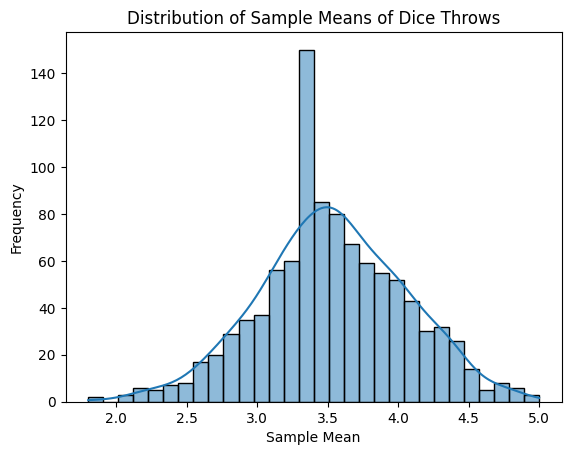

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 주사위를 10번 던져 나온 숫자의 평균을 구하는 함수
def throw_dice(n=10):
    return np.mean(np.random.randint(1, 7, size=n))

# 이 과정을 1000번 반복
sample_means = [throw_dice() for _ in range(1000)]

# 결과 시각화
sns.histplot(sample_means, bins=30, kde=True)
plt.title('Distribution of Sample Means of Dice Throws')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


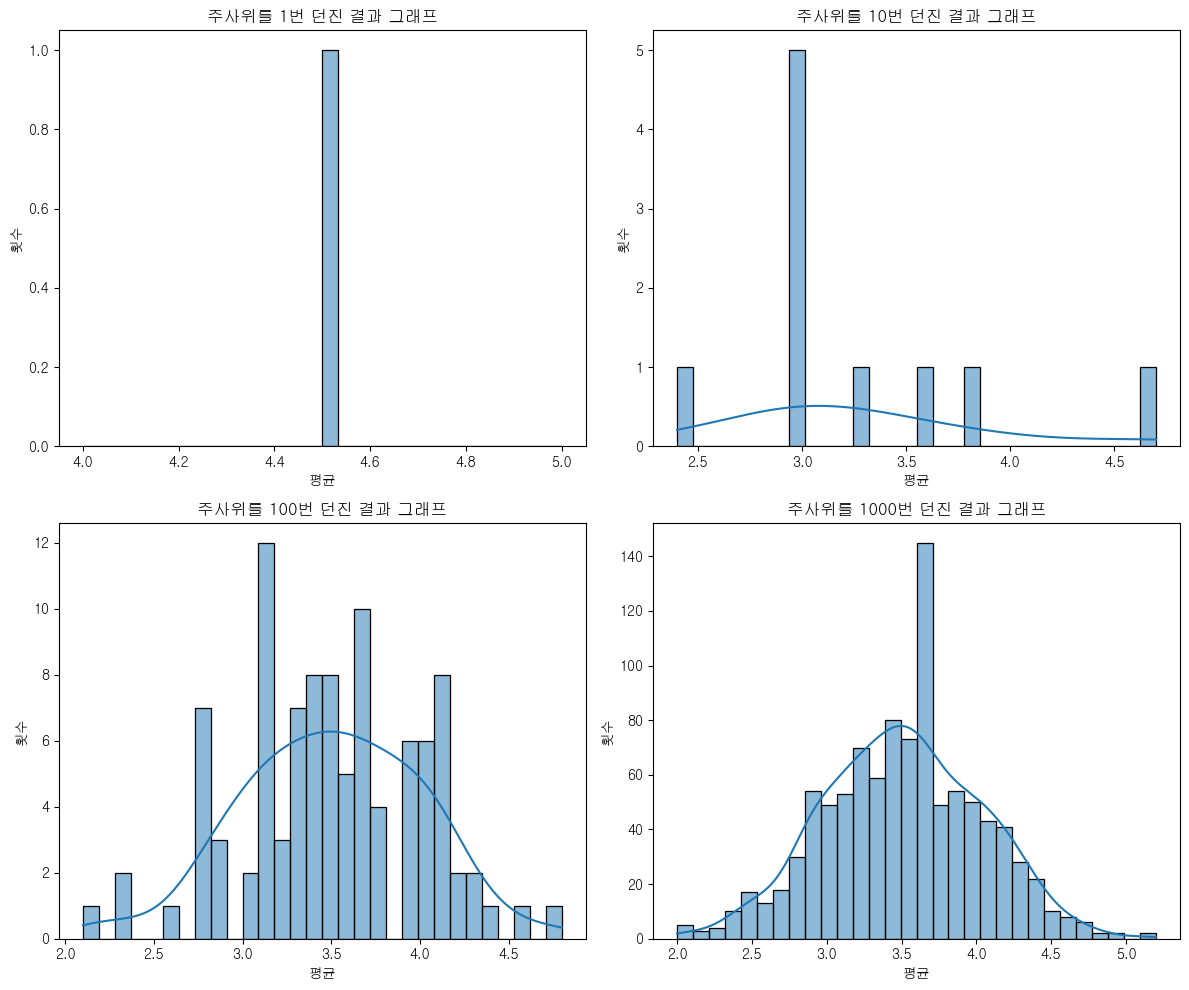

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 전역적으로 폰트를 설정합니다.
plt.rc('font', family='Gulim') 

# 주사위를 10번 던져 나온 숫자의 평균을 구하는 함수
def throw_dice(n=10):
    return np.mean(np.random.randint(1, 7, size=n))

# 주사위를 10번 던져 나온 숫자의 평균을 여러 번 반복하여 구하는 함수
def simulate_throws(repeats=1):
    return [throw_dice() for _ in range(repeats)]

repeat_counts = [1, 10, 100, 1000]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for idx, repeat in enumerate(repeat_counts):
    ax = axes[idx//2, idx%2]
    sample_means = simulate_throws(repeat)
    sns.histplot(sample_means, bins=30, kde=True, ax=ax)
    ax.set_title(f'주사위를 {repeat}번 던진 결과 그래프')
    ax.set_xlabel('평균')
    ax.set_ylabel('횟수')

plt.tight_layout()
plt.show()
